In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# Carga de datos
with open("datosEMT.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Pasar las fechas a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

# Eliminar los municipios sin datos (nombre)
df = df[df["nombre"].notna() & (df["nombre"].str.strip() != "")]

# Corregir formato de numeros
columnas_numericas = [
    "altitud", "tmed", "tmin", "tmax", "velmedia", "racha",
    "presMax", "presMin", "hrMedia", "hrMax", "hrMin"
]
# Cambiar las comas por puntos y "Varias" por null, despues a float
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(",", ".").replace("Varias", pd.NA)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Manejar valores faltantes con la media del municipio
columnas_numericas_validas = df.select_dtypes(include='number').columns
df[columnas_numericas_validas] = df.groupby("nombre")[columnas_numericas_validas].transform(lambda x: x.fillna(x.mean()))


Dimensiones del dataset: (122, 23)

Tipos de datos:
 fecha          datetime64[ns]
indicativo             object
nombre                 object
provincia              object
altitud                 int64
tmed                  float64
tmin                  float64
horatmin               object
tmax                  float64
horatmax               object
dir                    object
velmedia              float64
racha                 float64
horaracha              object
presMax               float64
horaPresMax            object
presMin               float64
horaPresMin            object
hrMedia                 int64
hrMax                   int64
horaHrMax              object
hrMin                   int64
horaHrMin              object
dtype: object

Valores nulos por columna:
 fecha          0
indicativo     0
nombre         0
provincia      0
altitud        0
tmed           0
tmin           0
horatmin       0
tmax           0
horatmax       0
dir            0
velmedia       0
racha     

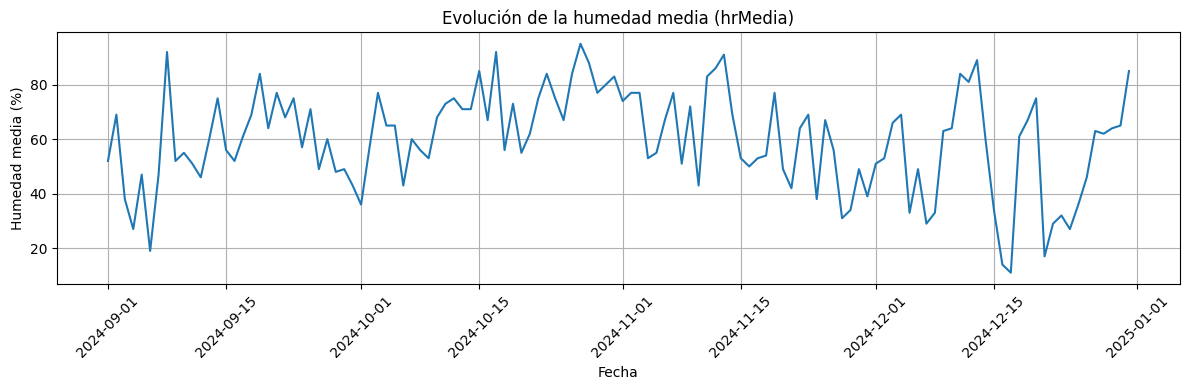

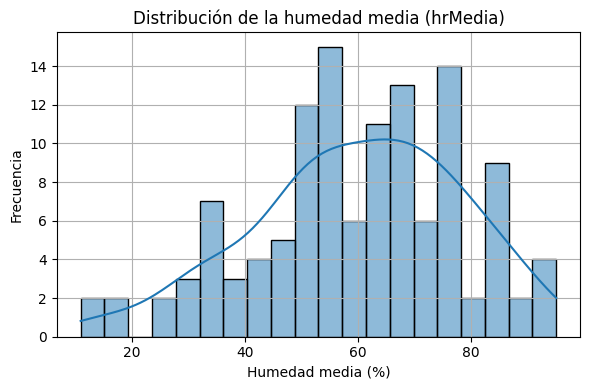

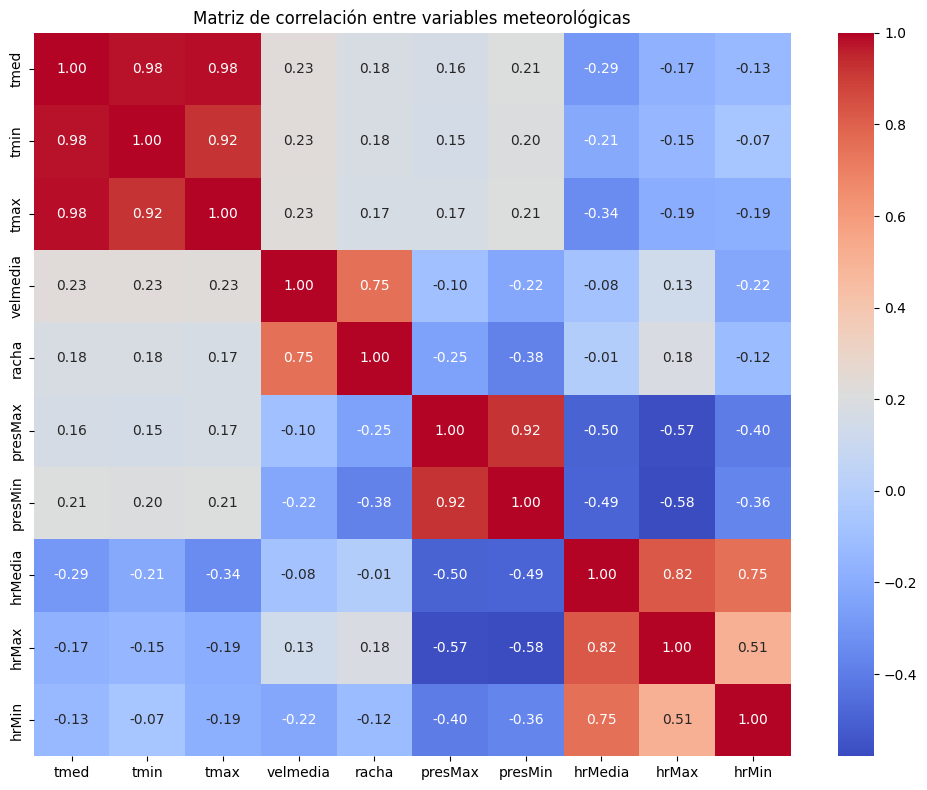

In [ ]:
# Información general del conjunto de datros
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())

# Estadísticas descriptivas de hrMedia
print("\nEstadísticas de 'hrMedia':\n", df["hrMedia"].describe())
print("\nMediana de 'hrMedia':", df["hrMedia"].median())

# Evolución temporal de hrMedia
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="fecha", y="hrMedia")
plt.title("Evolución de la humedad media (hrMedia)")
plt.xlabel("Fecha")
plt.ylabel("Humedad media (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#  Histograma de hrMedia
plt.figure(figsize=(6, 4))
sns.histplot(df["hrMedia"], bins=20, kde=True)
plt.title("Distribución de la humedad media (hrMedia)")
plt.xlabel("Humedad media (%)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Matriz de correlacion
variables_correlacion = ["tmed", "tmin", "tmax", "velmedia", "racha","presMax", "presMin", "hrMedia", "hrMax", "hrMin"]
correlacion = df[variables_correlacion].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables meteorológicas")
plt.tight_layout()
plt.show()